             Mean    Std Dev  Skewness  Median         Energy    Min     Max
953    968.532370  38.087937  4.538410   964.0  939505.239789  906.0  1260.0
915    960.045568  35.910211  4.658780   956.0  922976.677966  901.0  1235.0
989    967.593220  39.111912  4.215040   962.0  937765.956655  901.0  1248.0
957    962.974437  39.208241  4.387900   958.0  928856.626007  904.0  1243.0
942    970.038622  38.269399  4.594847   964.0  942439.067797  908.0  1286.0
...           ...        ...       ...     ...            ...    ...     ...
831    973.982495  72.590952  1.188947   965.0  953909.883023  708.0  1390.0
962.5  976.744929  65.501847  1.691513   966.0  958319.956377  743.0  1336.0
919    992.431231  45.911529  1.388619   984.0  987027.030842  830.0  1219.0
1211   991.007224  91.239771  2.183781   985.0  990417.701306  760.0  1513.0
952.1  977.994721  94.754220  2.464075   962.0  965449.541261  798.0  1481.0

[160 rows x 7 columns]


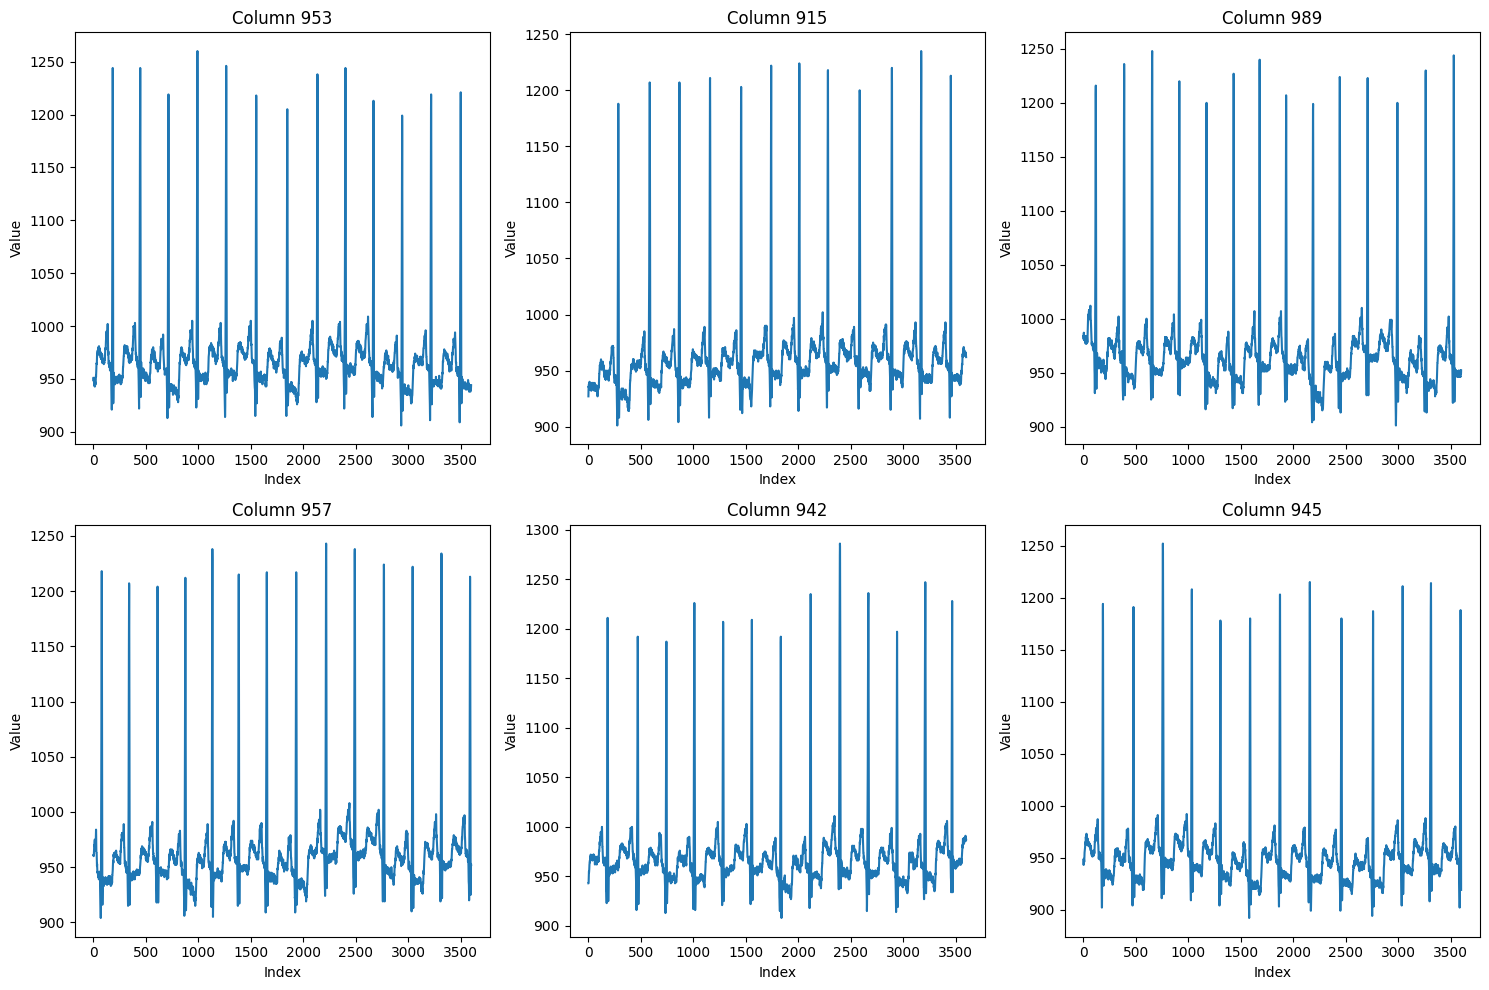

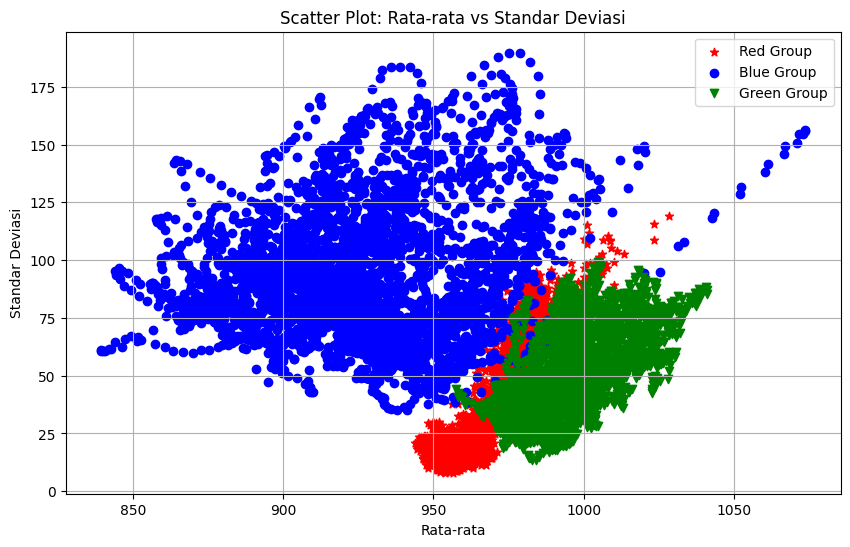

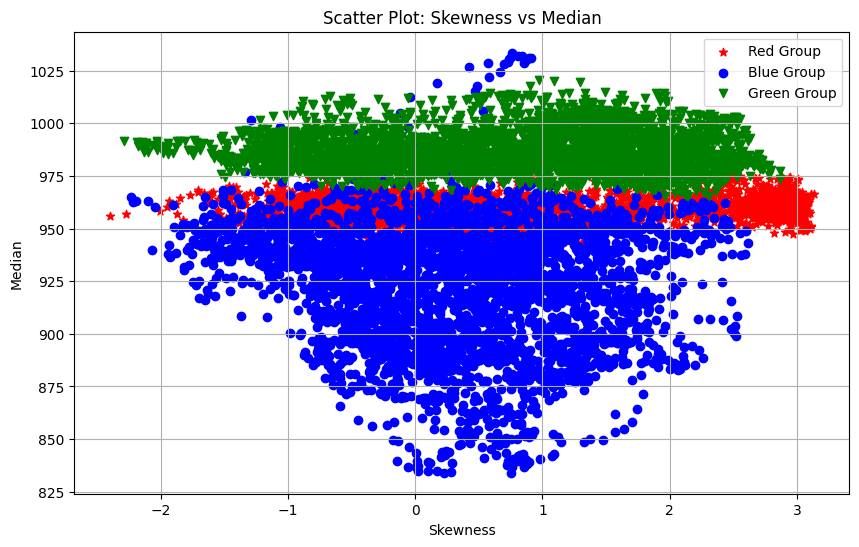

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

# Membaca dataset dari file CSV
df = pd.read_csv('data0-SZL.csv')

# Mendefinisikan fungsi untuk menghitung energi
def energy(column):
    return np.sum(column ** 2) / len(column)

# Menginisialisasi DataFrame untuk menyimpan hasil perhitungan
statistics = pd.DataFrame(columns=['Mean', 'Std Dev', 'Skewness', 'Median', 'Energy', 'Min', 'Max'])

# Melakukan perhitungan untuk setiap kolom
for column in df.columns:
    mean = df[column].mean()
    std_dev = df[column].std()
    skewness = skew(df[column])
    median = df[column].median()
    min_val = df[column].min()
    max_val = df[column].max()
    energy_val = energy(df[column])

    statistics.loc[column] = [mean, std_dev, skewness, median, energy_val, min_val, max_val]

# Menampilkan hasil perhitungan
print(statistics)

# Memilih 6 kolom secara bebas (misalnya kolom 0-5)
selected_columns = df.columns[:6]

# Membuat subplot 2x3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Memplot sinyal untuk setiap kolom yang dipilih
for i, column in enumerate(selected_columns):
    row = i // 3
    col = i % 3
    axs[row, col].plot(df[column])
    axs[row, col].set_title(f'Column {column}')
    axs[row, col].set_xlabel('Index')
    axs[row, col].set_ylabel('Value')

# Menampilkan plot
plt.tight_layout()
plt.show()

# Membagi kolom menjadi kelompok sesuai dengan instruksi
kolom_merah = df.columns[0:10]
kolom_biru = df.columns[10:20]
kolom_hijau = df.columns[20:30]

# Menginisialisasi warna dan tanda yang berbeda
colors = ['red', 'blue', 'green']
markers = ['*', 'o', 'v']
labels = ['Red Group', 'Blue Group', 'Green Group']

# Membuat scatter plot
plt.figure(figsize=(10, 6))
for i, kolom in enumerate([kolom_merah, kolom_biru, kolom_hijau]):
    rata_rata = df[kolom].mean(axis=1)
    std_dev = df[kolom].std(axis=1)
    plt.scatter(rata_rata, std_dev, color=colors[i], marker=markers[i], label=labels[i])

# Menambahkan label dan judul
plt.xlabel('Rata-rata')
plt.ylabel('Standar Deviasi')
plt.title('Scatter Plot: Rata-rata vs Standar Deviasi')
plt.legend()

# Menampilkan plot
plt.grid(True)
plt.show()

# Membagi kolom menjadi kelompok sesuai dengan instruksi
kolom_merah = df.columns[0:10]
kolom_biru = df.columns[10:20]
kolom_hijau = df.columns[20:30]

# Menginisialisasi warna dan tanda yang berbeda
colors = ['red', 'blue', 'green']
markers = ['*', 'o', 'v']
labels = ['Red Group', 'Blue Group', 'Green Group']

# Membuat scatter plot
plt.figure(figsize=(10, 6))
for i, kolom in enumerate([kolom_merah, kolom_biru, kolom_hijau]):
    skewness = df[kolom].apply(lambda x: x.skew(), axis=1)
    median = df[kolom].median(axis=1)
    plt.scatter(skewness, median, color=colors[i], marker=markers[i], label=labels[i])

# Menambahkan label dan judul
plt.xlabel('Skewness')
plt.ylabel('Median')
plt.title('Scatter Plot: Skewness vs Median')
plt.legend()

# Menampilkan plot
plt.grid(True)
plt.show()
